In [1]:
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
import numpy as np
import pandas as pd
import cospar as cs
import scipy.stats as stats
import cospar as cs
from scipy.stats import rankdata
import matplotlib.pyplot as plt

In [3]:
adata = sc.read_h5ad('/data/jiangjunyao/easyGRN/processed_data/celltag/celltag.h5ad')

In [6]:
adata.obs.time_info.value_counts()

Day21    1300
Day28     735
Day15     582
Day12     373
Day9       38
Day6        3
Name: time_info, dtype: int64

In [8]:
adata

AnnData object with n_obs × n_vars = 3031 × 28001
    obs: 'time_info', 'state_info', 'reprogram_trajectory', 'failed_trajectory', 'Reference_fate_bias', 'barcode_day0', 'barcode_day3', 'barcode_day13', 'barcode_all', 'ohters(reprogrammed)', 'Reprogrammed_fate_ratio', 'Reprogrammed_fate_bias', 'Failed_fate_ratio', 'Failed_fate_bias'
    uns: 'clonal_fate_bias', 'clonal_time_points', 'clone_id', 'data_des', 'ohters(reprogrammed)_colors', 'state_info_colors', 'time_info_colors', 'time_ordering'
    obsm: 'X_clone', 'X_clone_Concat_D0D3', 'X_clone_Concat_D0D3D13', 'X_clone_D0', 'X_clone_D13', 'X_clone_D3', 'X_clone_NonConcat_D0D3D13', 'X_emb', 'X_pca', 'X_umap'

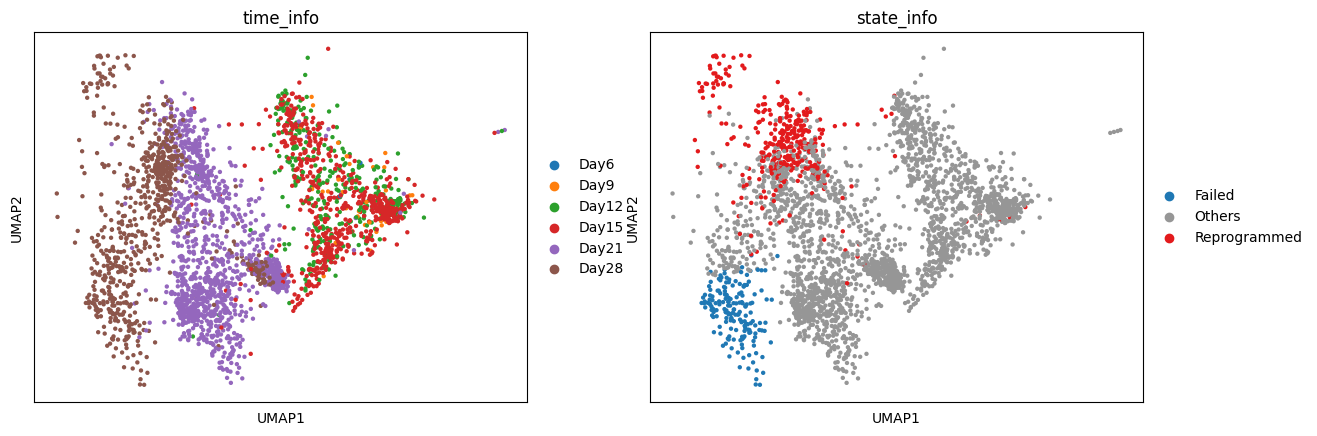

In [7]:
sc.pl.umap(adata,color=['time_info','state_info'])

In [14]:
adata2 = adata[adata.obs["reprogram_trajectory"] | adata.obs["failed_trajectory"]].copy()
adata2

AnnData object with n_obs × n_vars = 3031 × 28001
    obs: 'time_info', 'state_info', 'reprogram_trajectory', 'failed_trajectory', 'Reference_fate_bias', 'barcode_day0', 'barcode_day3', 'barcode_day13', 'barcode_all', 'ohters(reprogrammed)', 'Reprogrammed_fate_ratio', 'Reprogrammed_fate_bias', 'Failed_fate_ratio', 'Failed_fate_bias'
    uns: 'clonal_fate_bias', 'clonal_time_points', 'clone_id', 'data_des', 'ohters(reprogrammed)_colors', 'state_info_colors', 'time_info_colors', 'time_ordering'
    obsm: 'X_clone', 'X_clone_Concat_D0D3', 'X_clone_Concat_D0D3D13', 'X_clone_D0', 'X_clone_D13', 'X_clone_D3', 'X_clone_NonConcat_D0D3D13', 'X_emb', 'X_pca', 'X_umap'

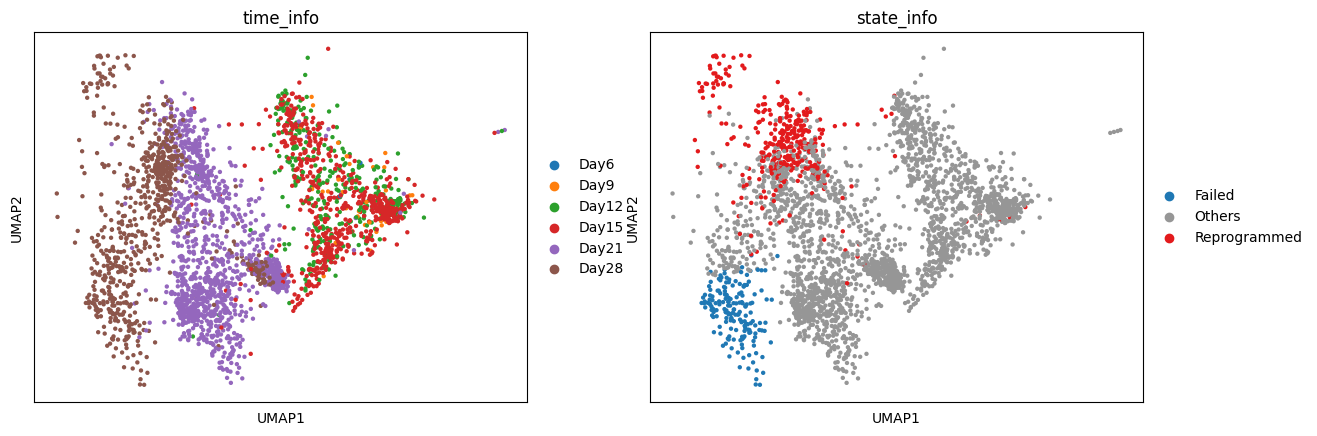

In [15]:
sc.pl.umap(adata2,color=['time_info','state_info'])

In [17]:
adata2.obs['time_info'].value_counts()

Day21    1300
Day28     735
Day15     582
Day12     373
Day9       38
Day6        3
Name: time_info, dtype: int64

In [31]:
adata2.obs['lineage'] = 'Failed'
adata2.obs.loc[adata2.obs["reprogram_trajectory"], 'lineage'] = 'reprogrammed'
adata2.obs['celltype'] = adata2.obs['state_info'].values.tolist()
adata2.obs.loc[adata2.obs["time_info"].isin(['Day6','Day9','Day12','Day15']), 'celltype'] = 'early'

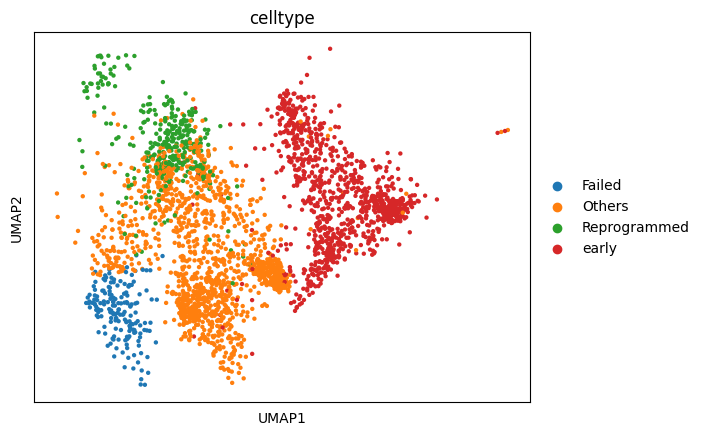

In [37]:
sc.pl.umap(adata2,color=['celltype'])

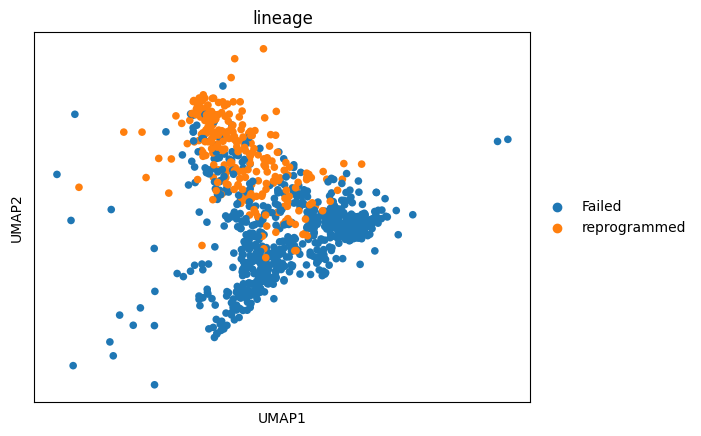

In [36]:
adata3 = adata2[adata2.obs.celltype=='early']
sc.pl.umap(adata3,color=['lineage'])

In [38]:
adata2.write('/data/jiangjunyao/AEGAS data/fate/CellTag2018.h5ad')